In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pyam

from pathlib import Path
from pandas_indexing import ismatch

C:\Users\gidden\AppData\Local\Temp\ipykernel_26896\1867457424.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\gidden\Miniconda3\envs\pyam\Lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
data_path = Path('../processed_data/')
ar6_path = Path('../raw_data/')

In [3]:
cdf = pd.read_csv(data_path / '../processed_data/102_ccs_data_r5_r10.csv', index_col=list(range(5))).rename(columns={'2100': 'End of Century'})
zdf = pd.read_csv(data_path / '102_netzero_ccs_data_r5_r10.csv', index_col=list(range(5))).rename(columns={'-2': 'Net Zero GHGs', '-1': 'Net Zero CO2'})
mdf = pd.read_excel(ar6_path / 'AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx', sheet_name='meta', index_col=list(range(2)))

In [4]:
# read using Sid's data
# limits = pd.read_csv(data_path / '101_D2_compiled_r5_r10.csv', index_col=0)


ldata = {
    'Main': {'World': {'Total': 1674, 'Onshore': 1200, 'Offshore': 474}},
    'Oil and Gas': {'World': {'Total': 903}}
    }
all_limits = pd.DataFrame(ldata).T.rename_axis(index='Coverage', columns='Region').stack().apply(pd.Series)

limits = pd.DataFrame([
    {'label': 'high', 'value':  all_limits.loc[ismatch(Coverage='Main', Region='World'), 'Total'][0], 'note': 'Global Preventative Limit',},
    {'label': 'med', 'value':  all_limits.loc[ismatch(Coverage='Main', Region='World'), 'Onshore'][0], 'note': 'Global Onshore Limit',},
    {'label': 'low', 'value':  all_limits.loc[ismatch(Coverage='Oil and Gas', Region='World'), 'Total'][0], 'note': 'Global Limit with Current Facilities',},
]).set_index('label')

C:\Users\gidden\AppData\Local\Temp\ipykernel_26896\3997287966.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  {'label': 'high', 'value':  all_limits.loc[ismatch(Coverage='Main', Region='World'), 'Total'][0], 'note': 'Global Preventative Limit',},
C:\Users\gidden\AppData\Local\Temp\ipykernel_26896\3997287966.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  {'label': 'med', 'value':  all_limits.loc[ismatch(Coverage='Main', Region='World'), 'Onshore'][0], 'note': 'Global Onshore Limit',},
C:\Users\gidden\AppData\Local\Temp\ipykernel_26896\3997287966.py:14: FutureWarning: Series.__getitem__ treating keys as posi

In [5]:
all_limits

,,Total,Onshore,Offshore
Coverage,Region,,,
Main,World,1674.0,1200.0,474.0
Oil and Gas,World,903.0,NaN,NaN


In [6]:
limits

,value,note
label,,
high,1674.0,Global Preventative Limit
med,1200.0,Global Onshore Limit
low,903.0,Global Limit with Current Facilities


In [7]:
limits.loc['high', 'value']

1674.0

# Global Exceedance

In [8]:
data = (
    pd.concat((cdf['End of Century'], zdf[['Net Zero GHGs', 'Net Zero CO2']]), axis=1)
    .join(mdf, on=['Model', 'Scenario'])
    .replace(to_replace={'Category': ['failed-vetting', 'no-climate-assessment']}, value=np.nan)
    .dropna(subset='Category')
)
data.head()

End of Century  \
Model       Scenario Region Variable                                   Unit                        
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr      2408.19060   
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr      1622.43730   
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr    143287.60730   
                            Cumulative Carbon Sequestration|CCS|Fossil Mt CO2/yr    111021.47115   
                     R5LAM  Carbon Sequestration|CCS                   Mt CO2/yr       339.18020   

                                                                                  Net Zero GHGs  \
Model       Scenario Region Variable                                   Unit                       
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr            NaN   
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr            NaN   
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr            NaN   
                            Cumulative Carbon Sequestration|CCS|Fossil Mt CO2/yr            NaN   
                     R5LAM  Carbon Sequestration|CCS                   Mt CO2/yr            NaN   

                                                                                  Net Zero CO2  \
Model       Scenario Region Variable                                   Unit                      
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr    2542.04550   
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr    1758.25900   
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr  118603.35425   
                            Cumulative Carbon Sequestration|CCS|Fossil Mt CO2/yr   94185.90050   
                     R5LAM  Carbon Sequestration|CCS                   Mt CO2/yr     352.64760   

                                                                                 Category  \
Model       Scenario Region Variable                                   Unit                 
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr       C3   
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr       C3   
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr       C3   
                            Cumulative Carbon Sequestration|CCS|Fossil Mt CO2/yr       C3   
                     R5LAM  Carbon Sequestration|CCS                   Mt CO2/yr       C3   

                                                                                                    Category_name  \
Model       Scenario Region Variable                                   Unit                                         
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr  C3: limit warming to 2°C (>67%)   
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr  C3: limit warming to 2°C (>67%)   
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr  C3: limit warming to 2°C (>67%)   
                            Cumulative Carbon Sequestration|CCS|Fossil Mt CO2/yr  C3: limit warming to 2°C (>67%)   
                     R5LAM  Carbon Sequestration|CCS                   Mt CO2/yr  C3: limit warming to 2°C (>67%)   

                                                                                 Category_subset  \
Model       Scenario Region Variable                                   Unit                        
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr     C3y_+veGHGs   
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr     C3y_+veGHGs   
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr     C3y_+veGHGs   
                            

In [9]:
def add_spans(ax, limits, orient='h'):
    func = ax.axvspan if orient == 'h' else ax.axhspan
    get = lambda l: limits.loc[l, 'value'] * 1e3
    func(0, get('low'), color='plum', alpha=0.25, zorder=0)
    func(get('low'), get('med'), color='orange', alpha=0.25, zorder=0)
    func(get('med'), get('high'), color='orangered', alpha=0.25, zorder=0)
    xmax = ax.get_xlim()[1] if orient == 'h' else ax.get_ylim()[1]
    if xmax > get('high'):
        func(get('high'), xmax, color='black', alpha=0.25, zorder=0)

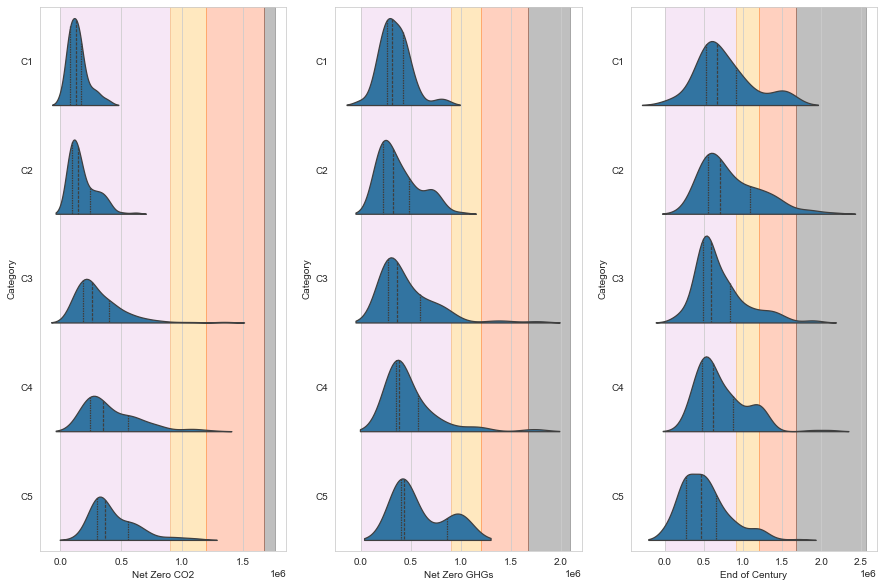

In [10]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

variables = ['Net Zero CO2', 'Net Zero GHGs', 'End of Century']
cats = ['C1', 'C2', 'C3', 'C4', 'C5']
for variable, ax in zip(variables, axs):
    sns.violinplot(
        data=data.loc[ismatch(Region='World', Variable='Cumulative Carbon Sequestration|CCS')].where(data.Category.isin(cats)),
        x=variable,
        y='Category',
        order=cats,
        inner='quart',
        split=True,
        ax=ax,
        )
    add_spans(ax, limits)




In [11]:
mdata = data.melt(id_vars=['Category'], value_vars=['Net Zero CO2', 'End of Century'], ignore_index=False)
mdata = mdata.where(mdata.Category.isin(cats))
mdata.head()

Category  \
Model       Scenario Region Variable                                   Unit                 
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr       C3   
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr       C3   
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr       C3   
                            Cumulative Carbon Sequestration|CCS|Fossil Mt CO2/yr       C3   
                     R5LAM  Carbon Sequestration|CCS                   Mt CO2/yr       C3   

                                                                                      variable  \
Model       Scenario Region Variable                                   Unit                      
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr  Net Zero CO2   
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr  Net Zero CO2   
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr  Net Zero CO2   
                            Cumulative Carbon Sequestration|CCS|Fossil Mt CO2/yr  Net Zero CO2   
                     R5LAM  Carbon Sequestration|CCS                   Mt CO2/yr  Net Zero CO2   

                                                                                         value  
Model       Scenario Region Variable                                   Unit                     
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr    2542.04550  
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr    1758.25900  
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr  118603.35425  
                            Cumulative Carbon Sequestration|CCS|Fossil Mt CO2/yr   94185.90050  
                     R5LAM  Carbon Sequestration|CCS                   Mt CO2/yr     352.64760

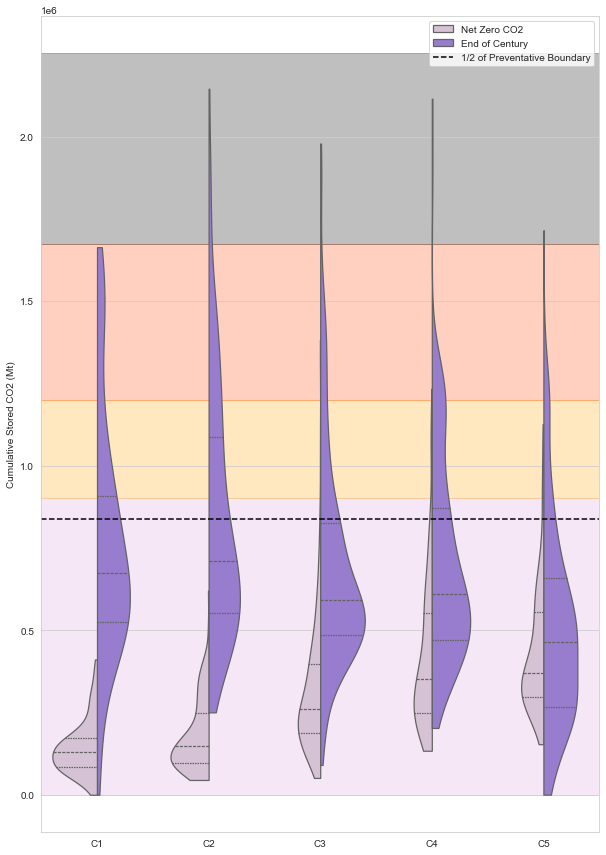

In [12]:

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 15))

palette = {
    'Net Zero CO2': 'thistle', 
    'End of Century': 'mediumpurple',
}

sns.violinplot(
        data=mdata.loc[ismatch(Region='World', Variable='Cumulative Carbon Sequestration|CCS')].reset_index(drop=True),
        y='value',
        hue='variable',
        x='Category',
        order=cats,
        inner='quart',
        split=True,
        cut=0,
        ax=ax,
        palette=palette,
        )

add_spans(ax, limits, orient='v')
ax.axhline(limits.loc['high', 'value'] * 1e3 * 0.5, c='k', ls='--', label='1/2 of Preventative Boundary')
ax.legend(loc='upper right')
ax.set_ylabel('Cumulative Stored CO2 (Mt)')
ax.set_xlabel('')

fig.savefig('./figure_3b.pdf', bbox_inches='tight', dpi=1e3)
fig.savefig('./figure_3b.png', bbox_inches='tight', dpi=1e3)

# Years of storage at net-zero levels

We look at the difference between cumulative CO2 stored at net-zero compared to the boundary, and then divide by the rate at net-zero.

In [28]:
limits

,value,note
label,,
high,1674.0,Global Preventative Limit
med,1200.0,Global Onshore Limit
low,903.0,Global Limit with Current Facilities


In [30]:
limit = limits.loc['high', 'value'] * 1e3

def calc_time_to_limit(value, note):
    print(value)
    limit = value * 1e3
    nz_value = zdf.loc[ismatch(Variable='Cumulative Carbon Sequestration|CCS', Region='World'), 'Net Zero CO2'].reset_index(level=['Variable'], drop=True)
    return ((limit - nz_value) / nz_value).pix.assign(label=note)

time_to_limit = pd.concat([calc_time_to_limit(row['value'], row['note']) for i, row in limits.iterrows()])
time_to_limit

1674.0
1200.0
903.0


Model              Scenario                 Region  Unit       label                               
AIM/CGE 2.0        ADVANCE_2020_1.5C-2100   World   Mt CO2/yr  Global Preventative Limit               28.391687
                   ADVANCE_2020_WB2C        World   Mt CO2/yr  Global Preventative Limit                5.093768
                   ADVANCE_2030_Price1.5C   World   Mt CO2/yr  Global Preventative Limit               35.735709
                   ADVANCE_2030_WB2C        World   Mt CO2/yr  Global Preventative Limit               20.734993
                   EMF30_ClimPolicy         World   Mt CO2/yr  Global Preventative Limit                1.691442
                                                                                                         ...    
WITCH-GLOBIOM 4.4  CD-LINKS_INDC2030i_1600  World   Mt CO2/yr  Global Limit with Current Facilities     0.863182
                   CD-LINKS_NDC2030i_1000   World   Mt CO2/yr  Global Limit with Current Facilities     4.023

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pyam

from pathlib import Path
from pandas_indexing import ismatch

C:\Users\gidden\AppData\Local\Temp\ipykernel_26896\1867457424.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\gidden\Miniconda3\envs\pyam\Lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [ ]:
data_path = Path('../processed_data/')
ar6_path = Path('../raw_data/')

In [ ]:
cdf = pd.read_csv(data_path / '../processed_data/102_ccs_data_r5_r10.csv', index_col=list(range(5))).rename(columns={'2100': 'End of Century'})
zdf = pd.read_csv(data_path / '102_netzero_ccs_data_r5_r10.csv', index_col=list(range(5))).rename(columns={'-2': 'Net Zero GHGs', '-1': 'Net Zero CO2'})
mdf = pd.read_excel(ar6_path / 'AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx', sheet_name='meta', index_col=list(range(2)))

In [ ]:
# read using Sid's data
# limits = pd.read_csv(data_path / '101_D2_compiled_r5_r10.csv', index_col=0)


ldata = {
    'Main': {'World': {'Total': 1674, 'Onshore': 1200, 'Offshore': 474}},
    'Oil and Gas': {'World': {'Total': 903}}
    }
all_limits = pd.DataFrame(ldata).T.rename_axis(index='Coverage', columns='Region').stack().apply(pd.Series)

limits = pd.DataFrame([
    {'label': 'high', 'value':  all_limits.loc[ismatch(Coverage='Main', Region='World'), 'Total'][0], 'note': 'Global Preventative Limit',},
    {'label': 'med', 'value':  all_limits.loc[ismatch(Coverage='Main', Region='World'), 'Onshore'][0], 'note': 'Global Onshore Limit',},
    {'label': 'low', 'value':  all_limits.loc[ismatch(Coverage='Oil and Gas', Region='World'), 'Total'][0], 'note': 'Global Limit with Current Facilities',},
]).set_index('label')

C:\Users\gidden\AppData\Local\Temp\ipykernel_26896\3997287966.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  {'label': 'high', 'value':  all_limits.loc[ismatch(Coverage='Main', Region='World'), 'Total'][0], 'note': 'Global Preventative Limit',},
C:\Users\gidden\AppData\Local\Temp\ipykernel_26896\3997287966.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  {'label': 'med', 'value':  all_limits.loc[ismatch(Coverage='Main', Region='World'), 'Onshore'][0], 'note': 'Global Onshore Limit',},
C:\Users\gidden\AppData\Local\Temp\ipykernel_26896\3997287966.py:14: FutureWarning: Series.__getitem__ treating keys as posi

In [ ]:
all_limits

,,Total,Onshore,Offshore
Coverage,Region,,,
Main,World,1674.0,1200.0,474.0
Oil and Gas,World,903.0,NaN,NaN


In [ ]:
limits

,value,note
label,,
high,1674.0,Global Preventative Limit
med,1200.0,Global Onshore Limit
low,903.0,Global Limit with Current Facilities


In [ ]:
limits.loc['high', 'value']

1674.0

# Global Exceedance

In [ ]:
data = (
    pd.concat((cdf['End of Century'], zdf[['Net Zero GHGs', 'Net Zero CO2']]), axis=1)
    .join(mdf, on=['Model', 'Scenario'])
    .replace(to_replace={'Category': ['failed-vetting', 'no-climate-assessment']}, value=np.nan)
    .dropna(subset='Category')
)
data.head()

End of Century  \
Model       Scenario Region Variable                                   Unit                        
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr      2408.19060   
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr      1622.43730   
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr    143287.60730   
                            Cumulative Carbon Sequestration|CCS|Fossil Mt CO2/yr    111021.47115   
                     R5LAM  Carbon Sequestration|CCS                   Mt CO2/yr       339.18020   

                                                                                  Net Zero GHGs  \
Model       Scenario Region Variable                                   Unit                       
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr            NaN   
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr            NaN   
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr            NaN   
                            Cumulative Carbon Sequestration|CCS|Fossil Mt CO2/yr            NaN   
                     R5LAM  Carbon Sequestration|CCS                   Mt CO2/yr            NaN   

                                                                                  Net Zero CO2  \
Model       Scenario Region Variable                                   Unit                      
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr    2542.04550   
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr    1758.25900   
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr  118603.35425   
                            Cumulative Carbon Sequestration|CCS|Fossil Mt CO2/yr   94185.90050   
                     R5LAM  Carbon Sequestration|CCS                   Mt CO2/yr     352.64760   

                                                                                 Category  \
Model       Scenario Region Variable                                   Unit                 
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr       C3   
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr       C3   
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr       C3   
                            Cumulative Carbon Sequestration|CCS|Fossil Mt CO2/yr       C3   
                     R5LAM  Carbon Sequestration|CCS                   Mt CO2/yr       C3   

                                                                                                    Category_name  \
Model       Scenario Region Variable                                   Unit                                         
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr  C3: limit warming to 2°C (>67%)   
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr  C3: limit warming to 2°C (>67%)   
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr  C3: limit warming to 2°C (>67%)   
                            Cumulative Carbon Sequestration|CCS|Fossil Mt CO2/yr  C3: limit warming to 2°C (>67%)   
                     R5LAM  Carbon Sequestration|CCS                   Mt CO2/yr  C3: limit warming to 2°C (>67%)   

                                                                                 Category_subset  \
Model       Scenario Region Variable                                   Unit                        
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr     C3y_+veGHGs   
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr     C3y_+veGHGs   
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr     C3y_+veGHGs   
                            

In [ ]:
def add_spans(ax, limits, orient='h'):
    func = ax.axvspan if orient == 'h' else ax.axhspan
    get = lambda l: limits.loc[l, 'value'] * 1e3
    func(0, get('low'), color='plum', alpha=0.25, zorder=0)
    func(get('low'), get('med'), color='orange', alpha=0.25, zorder=0)
    func(get('med'), get('high'), color='orangered', alpha=0.25, zorder=0)
    xmax = ax.get_xlim()[1] if orient == 'h' else ax.get_ylim()[1]
    if xmax > get('high'):
        func(get('high'), xmax, color='black', alpha=0.25, zorder=0)

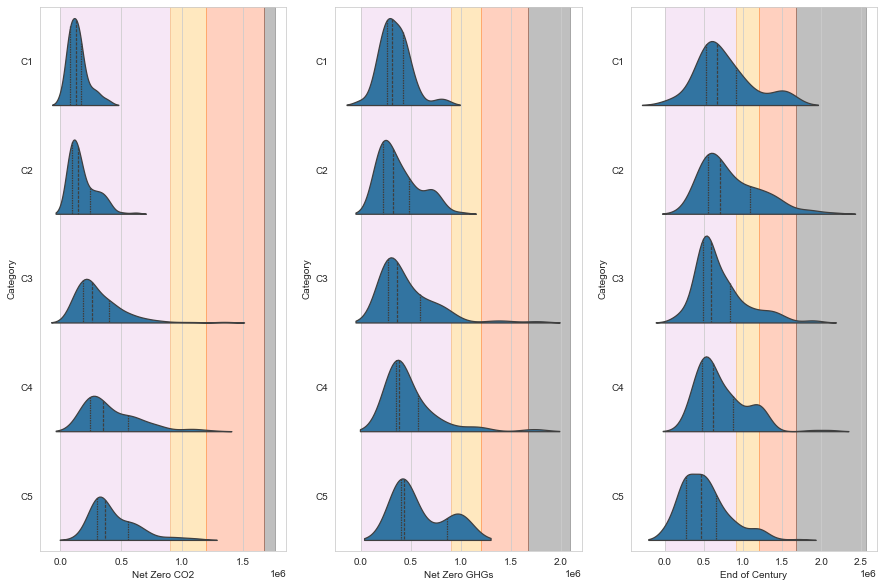

In [ ]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

variables = ['Net Zero CO2', 'Net Zero GHGs', 'End of Century']
cats = ['C1', 'C2', 'C3', 'C4', 'C5']
for variable, ax in zip(variables, axs):
    sns.violinplot(
        data=data.loc[ismatch(Region='World', Variable='Cumulative Carbon Sequestration|CCS')].where(data.Category.isin(cats)),
        x=variable,
        y='Category',
        order=cats,
        inner='quart',
        split=True,
        ax=ax,
        )
    add_spans(ax, limits)




In [ ]:
mdata = data.melt(id_vars=['Category'], value_vars=['Net Zero CO2', 'End of Century'], ignore_index=False)
mdata = mdata.where(mdata.Category.isin(cats))
mdata.head()

Category  \
Model       Scenario Region Variable                                   Unit                 
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr       C3   
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr       C3   
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr       C3   
                            Cumulative Carbon Sequestration|CCS|Fossil Mt CO2/yr       C3   
                     R5LAM  Carbon Sequestration|CCS                   Mt CO2/yr       C3   

                                                                                      variable  \
Model       Scenario Region Variable                                   Unit                      
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr  Net Zero CO2   
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr  Net Zero CO2   
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr  Net Zero CO2   
                            Cumulative Carbon Sequestration|CCS|Fossil Mt CO2/yr  Net Zero CO2   
                     R5LAM  Carbon Sequestration|CCS                   Mt CO2/yr  Net Zero CO2   

                                                                                         value  
Model       Scenario Region Variable                                   Unit                     
AIM/CGE 2.0 SSP1-26  R5ASIA Carbon Sequestration|CCS                   Mt CO2/yr    2542.04550  
                            Carbon Sequestration|CCS|Fossil            Mt CO2/yr    1758.25900  
                            Cumulative Carbon Sequestration|CCS        Mt CO2/yr  118603.35425  
                            Cumulative Carbon Sequestration|CCS|Fossil Mt CO2/yr   94185.90050  
                     R5LAM  Carbon Sequestration|CCS                   Mt CO2/yr     352.64760

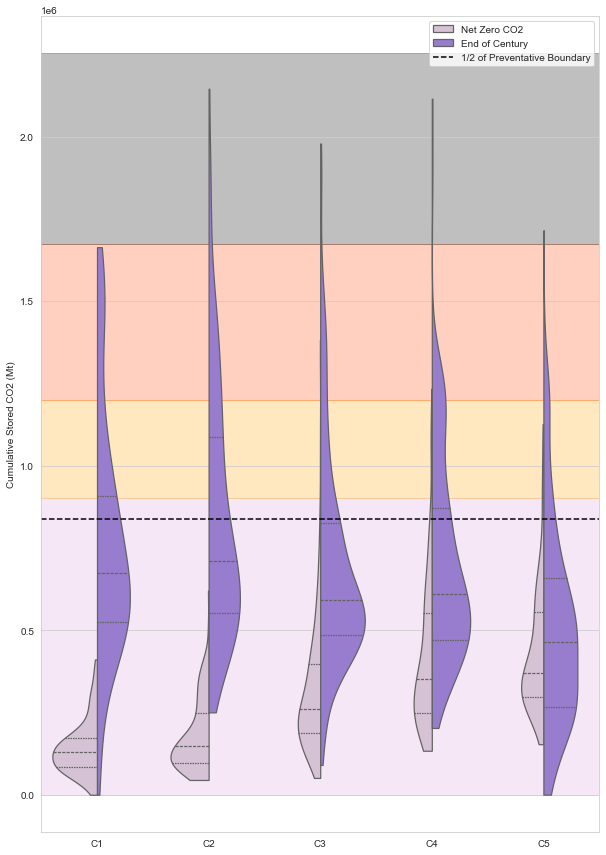

In [ ]:

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 15))

palette = {
    'Net Zero CO2': 'thistle', 
    'End of Century': 'mediumpurple',
}

sns.violinplot(
        data=mdata.loc[ismatch(Region='World', Variable='Cumulative Carbon Sequestration|CCS')].reset_index(drop=True),
        y='value',
        hue='variable',
        x='Category',
        order=cats,
        inner='quart',
        split=True,
        cut=0,
        ax=ax,
        palette=palette,
        )

add_spans(ax, limits, orient='v')
ax.axhline(limits.loc['high', 'value'] * 1e3 * 0.5, c='k', ls='--', label='1/2 of Preventative Boundary')
ax.legend(loc='upper right')
ax.set_ylabel('Cumulative Stored CO2 (Mt)')
ax.set_xlabel('')

fig.savefig('./figure_3b.pdf', bbox_inches='tight', dpi=1e3)
fig.savefig('./figure_3b.png', bbox_inches='tight', dpi=1e3)

# Years of storage at net-zero levels

We look at the difference between cumulative CO2 stored at net-zero compared to the boundary, and then divide by the rate at net-zero.

In [ ]:
limit = limits.loc['high', 'value'] * 1e3

time_to_limit = pd.concat([
    (
        (limit - zdf.loc[ismatch(Variable='Cumulative Carbon Sequestration|CCS', Region='World'), 'Net Zero CO2']).reset_index(level=['Variable'], drop=True)
        /
        zdf.loc[ismatch(Variable='Carbon Sequestration|CCS', Region='World'), 'Net Zero CO2'].reset_index(level=['Variable'], drop=True)
    ).pix.assign(label=note),
    for value, note in limits.iterrows()
])
time_to_limit.head()

Model        Scenario                Region  Unit       label                    
AIM/CGE 2.0  ADVANCE_2020_1.5C-2100  World   Mt CO2/yr  Global Preventative Limit    256.511458
             ADVANCE_2020_WB2C       World   Mt CO2/yr  Global Preventative Limit     81.230379
             ADVANCE_2030_Price1.5C  World   Mt CO2/yr  Global Preventative Limit    281.543828
             ADVANCE_2030_WB2C       World   Mt CO2/yr  Global Preventative Limit    200.276917
             EMF30_ClimPolicy        World   Mt CO2/yr  Global Preventative Limit     60.132076
Name: Net Zero CO2, dtype: float64

In [ ]:
tdata = (
    time_to_limit.to_frame(name='Years to Exceed at Net-zero CO2 Levels')
    .join(mdf, on=['Model', 'Scenario'])
    .replace(to_replace={'Category': ['failed-vetting', 'no-climate-assessment']}, value=np.nan)
    .dropna(subset='Category')
)
tdata.head()

Years to Exceed at Net-zero CO2 Levels  \
Model       Scenario               Region Unit                                                
AIM/CGE 2.0 SSP1-26                World  Mt CO2/yr                              143.708608   
            SSP4-26                World  Mt CO2/yr                               52.770330   
AIM/CGE 2.1 CD-LINKS_NDC2030i_1000 World  Mt CO2/yr                               88.984805   
            CD-LINKS_NPi2020_1000  World  Mt CO2/yr                               70.644425   
            CD-LINKS_NPi2020_400   World  Mt CO2/yr                              134.982845   

                                                    Category  \
Model       Scenario               Region Unit                 
AIM/CGE 2.0 SSP1-26                World  Mt CO2/yr       C3   
            SSP4-26                World  Mt CO2/yr       C3   
AIM/CGE 2.1 CD-LINKS_NDC2030i_1000 World  Mt CO2/yr       C4   
            CD-LINKS_NPi2020_1000  World  Mt CO2/yr       C3   
            CD-LINKS_NPi2020_400   World  Mt CO2/yr       C1   

                                                                                         Category_name  \
Model       Scenario               Region Unit                                                           
AIM/CGE 2.0 SSP1-26                World  Mt CO2/yr                    C3: limit warming to 2°C (>67%)   
            SSP4-26                World  Mt CO2/yr                    C3: limit warming to 2°C (>67%)   
AIM/CGE 2.1 CD-LINKS_NDC2030i_1000 World  Mt CO2/yr                    C4: limit warming to 2°C (>50%)   
            CD-LINKS_NPi2020_1000  World  Mt CO2/yr                    C3: limit warming to 2°C (>67%)   
            CD-LINKS_NPi2020_400   World  Mt CO2/yr  C1: limit warming to 1.5°C (>50%) with no or l...   

                                                    Category_subset  \
Model       Scenario               Region Unit                        
AIM/CGE 2.0 SSP1-26                World  Mt CO2/yr     C3y_+veGHGs   
            SSP4-26                World  Mt CO2/yr     C3y_+veGHGs   
AIM/CGE 2.1 CD-LINKS_NDC2030i_1000 World  Mt CO2/yr              C4   
            CD-LINKS_NPi2020_1000  World  Mt CO2/yr     C3y_+veGHGs   
            CD-LINKS_NPi2020_400   World  Mt CO2/yr      C1a_NZGHGs   

                                                                                            Subset_Ch4  \
Model       Scenario               Region Unit                                                           
AIM/CGE 2.0 SSP1-26                World  Mt CO2/yr           Limit to 2C (>67%) immediate 2020 action   
            SSP4-26                World  Mt CO2/yr           Limit to 2C (>67%) immediate 2020 action   
AIM/CGE 2.1 CD-LINKS_NDC2030i_1000 World  Mt CO2/yr                                                NaN   
            CD-LINKS_NPi2020_1000  World  Mt CO2/yr           Limit to 2C (>67%) immediate 2020 action   
            CD-LINKS_NPi2020_400   World  Mt CO2/yr  Limit to 1.5C (>50%) no or low OS immediate 20...   

                                                    Category_Vetting_historical  \
Model       Scenario               Region Unit                                    
AIM/CGE 2.0 SSP1-26                World  Mt CO2/yr                          C3   
            SSP4-26                World  Mt CO2/yr                          C3   
AIM/CGE 2.1 CD-LINKS_NDC2030i_1000 World  Mt CO2/yr                          C4   
            CD-LINKS_NPi2020_1000  World  Mt CO2/yr                          C3   
            CD-LINKS_NPi2020_400   World  Mt CO2/yr                          C1   

                                                    IMP_marker  \
Model       Scenario               Region Unit                   
AIM/CGE 2.0 SSP1-26                World  Mt CO2/yr    non-IMP   
            SSP4-26                World  Mt CO2/yr    non-IMP   
AIM/CGE 2.1 CD-LINKS_NDC2030i_1000 World  Mt CO2/yr    non-IMP   
            CD-LINKS_NPi2020_1000  World  

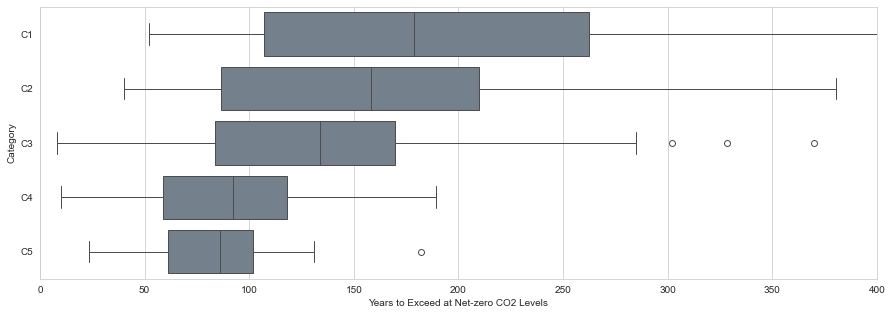

In [ ]:
# TODO: ???? compare with other plot; answer - different limit applied

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(
        data=tdata.reset_index(drop=True),
        x='Years to Exceed at Net-zero CO2 Levels',
        y='Category',
        order=cats,
#        inner='quart',
#        split=True,
#        cut=0,
        ax=ax,
        color='slategrey'
        )

ax.set_xlim(0, 400)

fig.savefig('./figure_3c.pdf', bbox_inches='tight', dpi=1e3)
fig.savefig('./figure_3c.png', bbox_inches='tight', dpi=1e3)

# Years until boundary is reached

In [ ]:
ydf = cdf.loc[ismatch(Variable='Cumulative Carbon Sequestration|CCS', Region='World')].rename(columns={'End of Century': '2100'})
ydf.columns = ydf.columns.astype(int)
ydf[list(range(2101, 2301))] = np.nan
extrap_ydf = ydf.interpolate(method="slinear", fill_value="extrapolate", limit_direction="both", axis=1)
extrap_ydf.head()

C:\Users\gidden\AppData\Local\Temp\ipykernel_26896\2687400121.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ydf[list(range(2101, 2301))] = np.nan
C:\Users\gidden\AppData\Local\Temp\ipykernel_26896\2687400121.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ydf[list(range(2101, 2301))] = np.nan
C:\Users\gidden\AppData\Local\Temp\ipykernel_26896\2687400121.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

1990  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

                                                                                         1995  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

                                                                                         2000  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

                                                                                         2005  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

                                                                                         2010  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

                                                                                         2011  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

         

In [ ]:
limit = limits.loc['World', 'Net total storage'] * 1e3
year_exceedance = (extrap_ydf > limit).idxmax(axis=1)
year_exceedance[year_exceedance == 1990] = np.nan
year_exceedance.head()


KeyError: 'Net total storage'

In [ ]:
ydata = (
    year_exceedance.to_frame(name='Exceedance Year')
    .join(mdf, on=['Model', 'Scenario'])
    .replace(to_replace={'Category': ['failed-vetting', 'no-climate-assessment']}, value=np.nan)
    .dropna(subset='Category')
)
ydata.head()

Exceedance Year  \
Model       Scenario Region Variable                            Unit                         
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr           2219.0   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr              NaN   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr              NaN   
            SSP4-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr           2127.0   
            SSP4-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr           2163.0   

                                                                          Category  \
Model       Scenario Region Variable                            Unit                 
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr       C3   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr       C5   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr       C6   
            SSP4-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr       C3   
            SSP4-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr       C5   

                                                                                               Category_name  \
Model       Scenario Region Variable                            Unit                                           
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr    C3: limit warming to 2°C (>67%)   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr  C5: limit warming to 2.5°C (>50%)   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr    C6: limit warming to 3°C (>50%)   
            SSP4-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr    C3: limit warming to 2°C (>67%)   
            SSP4-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr  C5: limit warming to 2.5°C (>50%)   

                                                                          Category_subset  \
Model       Scenario Region Variable                            Unit                        
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr     C3y_+veGHGs   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr              C5   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr              C6   
            SSP4-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr     C3y_+veGHGs   
            SSP4-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr              C5   

                                                                                                         Subset_Ch4  \
Model       Scenario Region Variable                            Unit                                                  
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr  Limit to 2C (>67%) immediate 2020 action   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                                       NaN   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                                       NaN   
            SSP4-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr  Limit to 2C (>67%) immediate 2020 action   
            SSP4-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                                       NaN   

                                                                          Category_Vetting_historical  \
Model       Scenario Region Variable                            Unit                                    
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                          C3   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                          C5   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                          C6   
            SSP4-

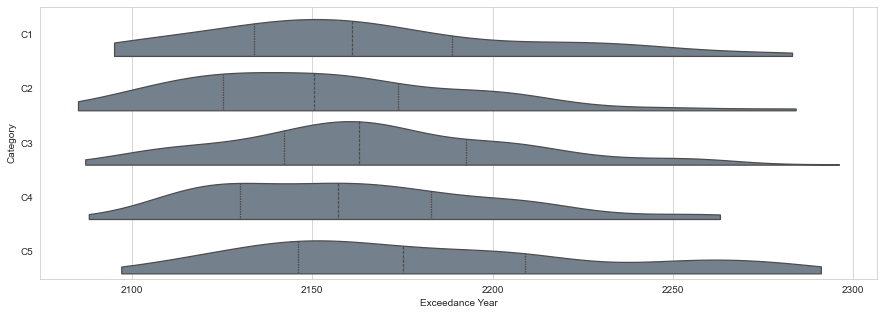

In [ ]:
# TODO: add fraction of scenarios in category in this dataset

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 5))

sns.violinplot(
        data=ydata.reset_index(drop=True),
        x='Exceedance Year',
        y='Category',
        order=cats,
        inner='quart',
        split=True,
        cut=0,
        ax=ax,
        color='slategrey'
        )

fig.savefig('./figure_3d_violin.pdf', bbox_inches='tight', dpi=1e3)

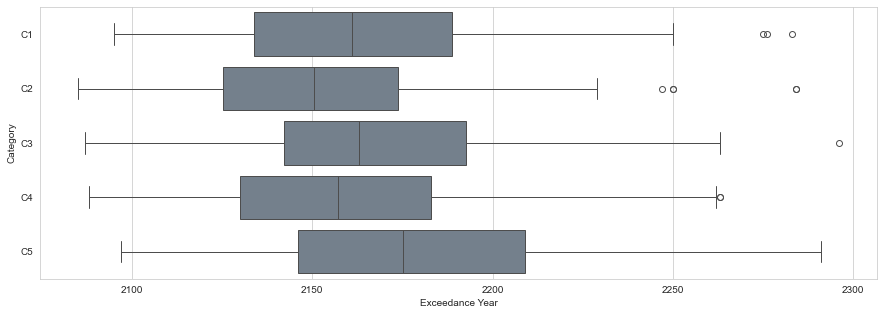

In [ ]:
# TODO: ???? compare with other plot

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(
        data=ydata.reset_index(drop=True),
        x='Exceedance Year',
        y='Category',
        order=cats,
#        inner='quart',
#        split=True,
#        cut=0,
        ax=ax,
        color='slategrey'
        )


fig.savefig('./figure_3d.pdf', bbox_inches='tight', dpi=1e3)
fig.savefig('./figure_3d.png', bbox_inches='tight', dpi=1e3)

# Regional Exceedance

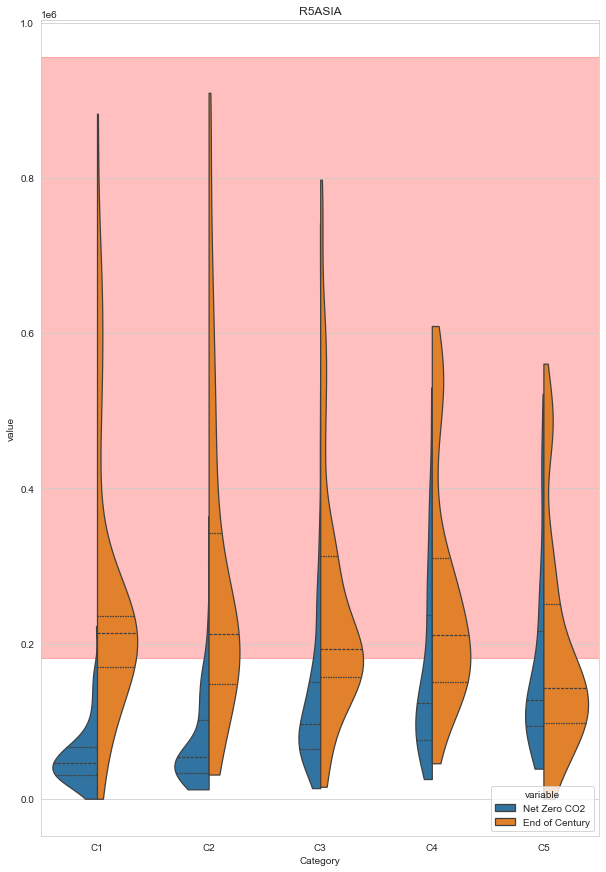

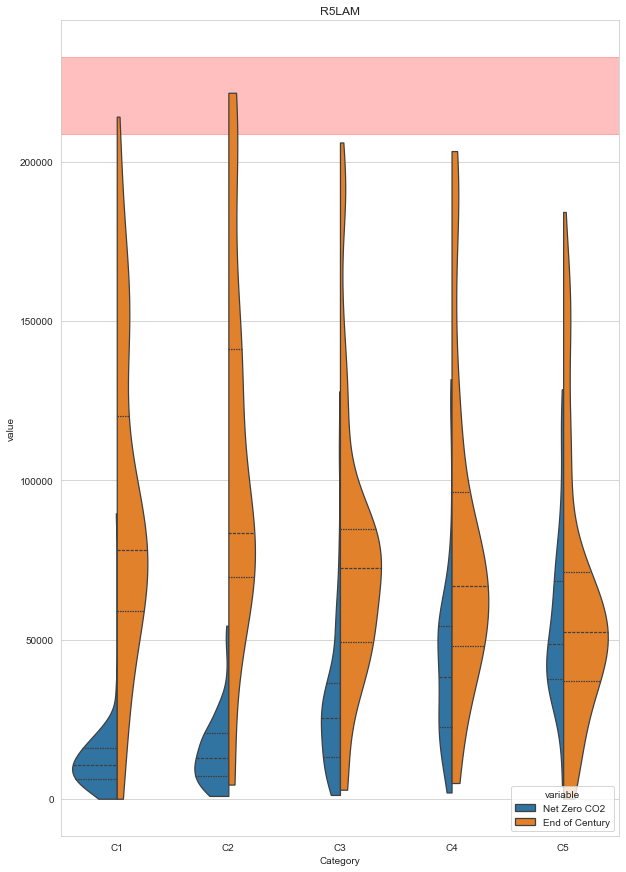

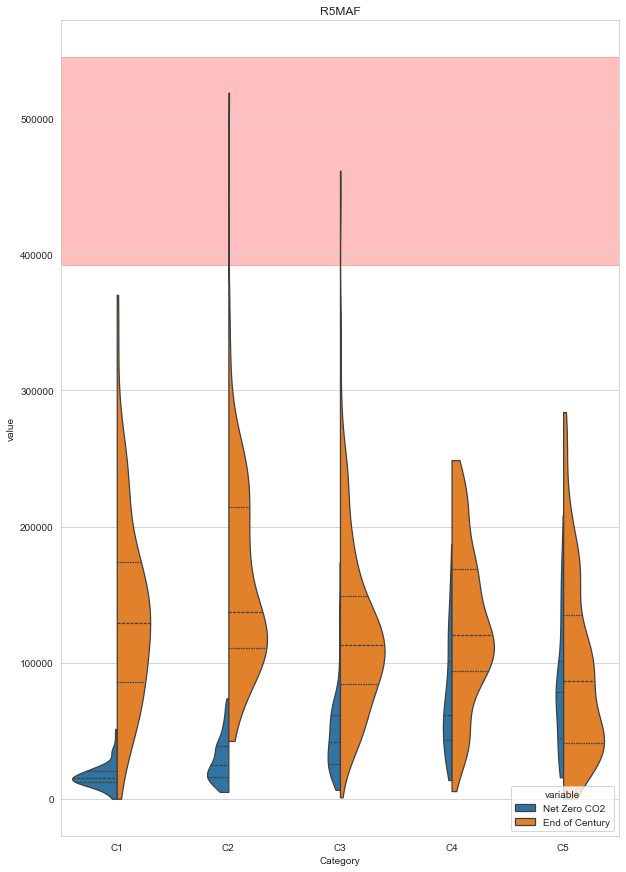

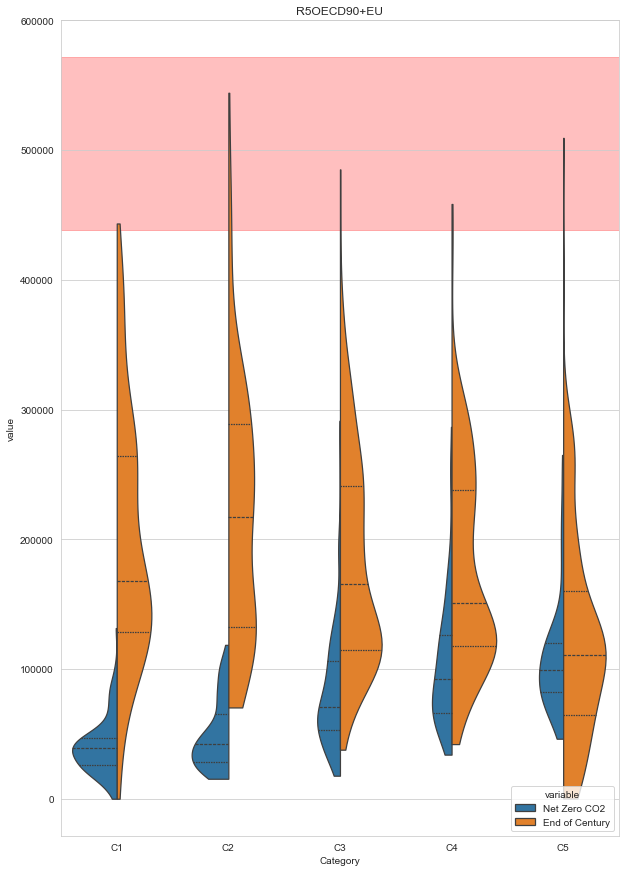

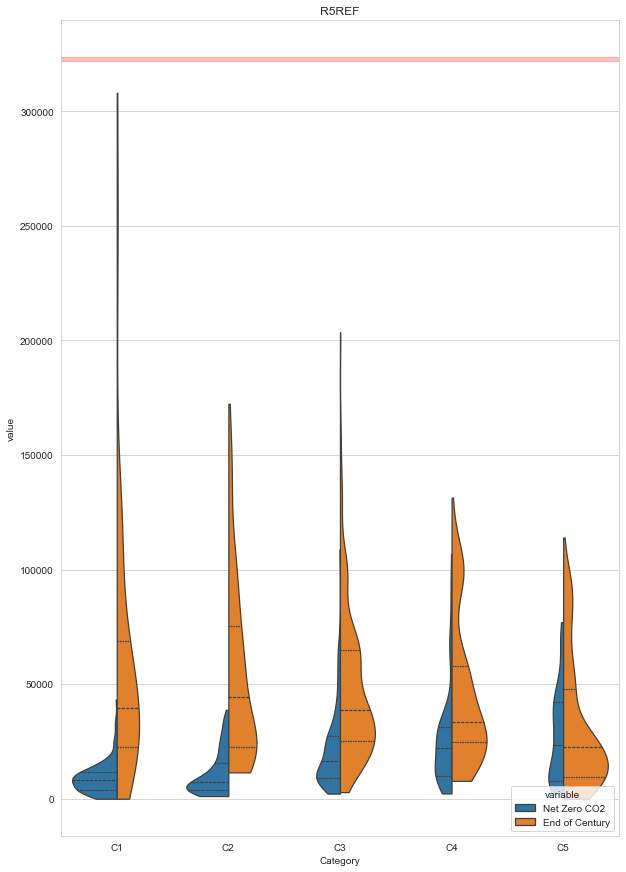

In [ ]:
regions = limits.pix.unique('Region')[limits.pix.unique('Region').str.startswith('R5')]

for region in regions:
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(10, 15))

    sns.violinplot(
            data=mdata.loc[ismatch(Region=region, Variable='Cumulative Carbon Sequestration|CCS')].reset_index(drop=True),
            y='value',
            hue='variable',
            x='Category',
            order=cats,
            inner='quart',
            split=True,
            cut=0,
            ax=ax,
            )

    limit = limits.loc[region, 'Net total storage'] * 1e3
    ax.set_title(region)
    ax.axhspan(limit, ax.get_ylim()[1], color='red', alpha=0.25, zorder=0)

In [24]:
limits

,value,note
label,,
high,1674.0,Global Preventative Limit
med,1200.0,Global Onshore Limit
low,903.0,Global Limit with Current Facilities


In [20]:
limits

,value,note
label,,
high,1674.0,Global Preventative Limit
med,1200.0,Global Onshore Limit
low,903.0,Global Limit with Current Facilities


In [14]:
tdata = (
    time_to_limit.to_frame(name='Years to Exceed at Net-zero CO2 Levels')
    .join(mdf, on=['Model', 'Scenario'])
    .replace(to_replace={'Category': ['failed-vetting', 'no-climate-assessment']}, value=np.nan)
    .dropna(subset='Category')
)
tdata.head()

Years to Exceed at Net-zero CO2 Levels  \
Model       Scenario               Region Unit                                                
AIM/CGE 2.0 SSP1-26                World  Mt CO2/yr                              143.708608   
            SSP4-26                World  Mt CO2/yr                               52.770330   
AIM/CGE 2.1 CD-LINKS_NDC2030i_1000 World  Mt CO2/yr                               88.984805   
            CD-LINKS_NPi2020_1000  World  Mt CO2/yr                               70.644425   
            CD-LINKS_NPi2020_400   World  Mt CO2/yr                              134.982845   

                                                    Category  \
Model       Scenario               Region Unit                 
AIM/CGE 2.0 SSP1-26                World  Mt CO2/yr       C3   
            SSP4-26                World  Mt CO2/yr       C3   
AIM/CGE 2.1 CD-LINKS_NDC2030i_1000 World  Mt CO2/yr       C4   
            CD-LINKS_NPi2020_1000  World  Mt CO2/yr       C3   
            CD-LINKS_NPi2020_400   World  Mt CO2/yr       C1   

                                                                                         Category_name  \
Model       Scenario               Region Unit                                                           
AIM/CGE 2.0 SSP1-26                World  Mt CO2/yr                    C3: limit warming to 2°C (>67%)   
            SSP4-26                World  Mt CO2/yr                    C3: limit warming to 2°C (>67%)   
AIM/CGE 2.1 CD-LINKS_NDC2030i_1000 World  Mt CO2/yr                    C4: limit warming to 2°C (>50%)   
            CD-LINKS_NPi2020_1000  World  Mt CO2/yr                    C3: limit warming to 2°C (>67%)   
            CD-LINKS_NPi2020_400   World  Mt CO2/yr  C1: limit warming to 1.5°C (>50%) with no or l...   

                                                    Category_subset  \
Model       Scenario               Region Unit                        
AIM/CGE 2.0 SSP1-26                World  Mt CO2/yr     C3y_+veGHGs   
            SSP4-26                World  Mt CO2/yr     C3y_+veGHGs   
AIM/CGE 2.1 CD-LINKS_NDC2030i_1000 World  Mt CO2/yr              C4   
            CD-LINKS_NPi2020_1000  World  Mt CO2/yr     C3y_+veGHGs   
            CD-LINKS_NPi2020_400   World  Mt CO2/yr      C1a_NZGHGs   

                                                                                            Subset_Ch4  \
Model       Scenario               Region Unit                                                           
AIM/CGE 2.0 SSP1-26                World  Mt CO2/yr           Limit to 2C (>67%) immediate 2020 action   
            SSP4-26                World  Mt CO2/yr           Limit to 2C (>67%) immediate 2020 action   
AIM/CGE 2.1 CD-LINKS_NDC2030i_1000 World  Mt CO2/yr                                                NaN   
            CD-LINKS_NPi2020_1000  World  Mt CO2/yr           Limit to 2C (>67%) immediate 2020 action   
            CD-LINKS_NPi2020_400   World  Mt CO2/yr  Limit to 1.5C (>50%) no or low OS immediate 20...   

                                                    Category_Vetting_historical  \
Model       Scenario               Region Unit                                    
AIM/CGE 2.0 SSP1-26                World  Mt CO2/yr                          C3   
            SSP4-26                World  Mt CO2/yr                          C3   
AIM/CGE 2.1 CD-LINKS_NDC2030i_1000 World  Mt CO2/yr                          C4   
            CD-LINKS_NPi2020_1000  World  Mt CO2/yr                          C3   
            CD-LINKS_NPi2020_400   World  Mt CO2/yr                          C1   

                                                    IMP_marker  \
Model       Scenario               Region Unit                   
AIM/CGE 2.0 SSP1-26                World  Mt CO2/yr    non-IMP   
            SSP4-26                World  Mt CO2/yr    non-IMP   
AIM/CGE 2.1 CD-LINKS_NDC2030i_1000 World  Mt CO2/yr    non-IMP   
            CD-LINKS_NPi2020_1000  World  

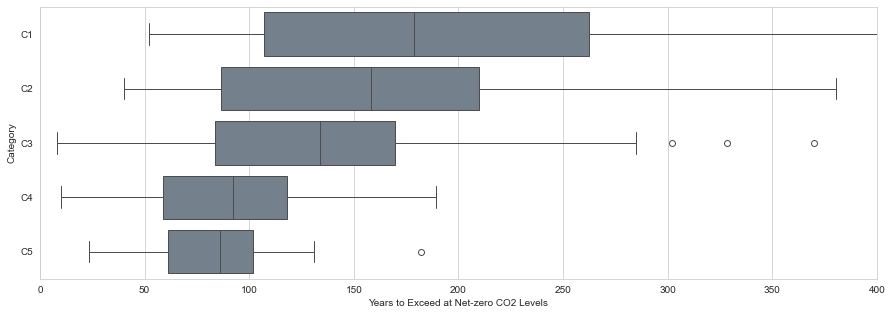

In [16]:
# TODO: ???? compare with other plot; answer - different limit applied

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(
        data=tdata.reset_index(drop=True),
        x='Years to Exceed at Net-zero CO2 Levels',
        y='Category',
        order=cats,
#        inner='quart',
#        split=True,
#        cut=0,
        ax=ax,
        color='slategrey'
        )

ax.set_xlim(0, 400)

fig.savefig('./figure_3c.pdf', bbox_inches='tight', dpi=1e3)
fig.savefig('./figure_3c.png', bbox_inches='tight', dpi=1e3)

In [ ]:
# TODO: ???? compare with other plot; answer - different limit applied

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(
        data=tdata.reset_index(drop=True),
        x='Years to Exceed at Net-zero CO2 Levels',
        y='Category',
        order=cats,
#        inner='quart',
#        split=True,
#        cut=0,
        ax=ax,
        color='slategrey'
        )

ax.set_xlim(0, 400)

fig.savefig('./figure_3c.pdf', bbox_inches='tight', dpi=1e3)
fig.savefig('./figure_3c.png', bbox_inches='tight', dpi=1e3)

# Years until boundary is reached

In [17]:
ydf = cdf.loc[ismatch(Variable='Cumulative Carbon Sequestration|CCS', Region='World')].rename(columns={'End of Century': '2100'})
ydf.columns = ydf.columns.astype(int)
ydf[list(range(2101, 2301))] = np.nan
extrap_ydf = ydf.interpolate(method="slinear", fill_value="extrapolate", limit_direction="both", axis=1)
extrap_ydf.head()

C:\Users\gidden\AppData\Local\Temp\ipykernel_26896\2687400121.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ydf[list(range(2101, 2301))] = np.nan
C:\Users\gidden\AppData\Local\Temp\ipykernel_26896\2687400121.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ydf[list(range(2101, 2301))] = np.nan
C:\Users\gidden\AppData\Local\Temp\ipykernel_26896\2687400121.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

1990  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

                                                                                         1995  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

                                                                                         2000  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

                                                                                         2005  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

                                                                                         2010  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

                                                                                         2011  \
Model       Scenario               Region Variable                            Unit              
AIM/CGE 2.0 ADVANCE_2020_1.5C-2100 World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2020_WB2C      World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Med2C     World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   
            ADVANCE_2030_Price1.5C World  Cumulative Carbon Sequestration|CCS Mt CO2/yr   0.0   

         

In [18]:
limit = limits.loc['World', 'Net total storage'] * 1e3
year_exceedance = (extrap_ydf > limit).idxmax(axis=1)
year_exceedance[year_exceedance == 1990] = np.nan
year_exceedance.head()


KeyError: 'Net total storage'

In [ ]:
ydata = (
    year_exceedance.to_frame(name='Exceedance Year')
    .join(mdf, on=['Model', 'Scenario'])
    .replace(to_replace={'Category': ['failed-vetting', 'no-climate-assessment']}, value=np.nan)
    .dropna(subset='Category')
)
ydata.head()

Exceedance Year  \
Model       Scenario Region Variable                            Unit                         
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr           2219.0   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr              NaN   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr              NaN   
            SSP4-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr           2127.0   
            SSP4-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr           2163.0   

                                                                          Category  \
Model       Scenario Region Variable                            Unit                 
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr       C3   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr       C5   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr       C6   
            SSP4-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr       C3   
            SSP4-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr       C5   

                                                                                               Category_name  \
Model       Scenario Region Variable                            Unit                                           
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr    C3: limit warming to 2°C (>67%)   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr  C5: limit warming to 2.5°C (>50%)   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr    C6: limit warming to 3°C (>50%)   
            SSP4-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr    C3: limit warming to 2°C (>67%)   
            SSP4-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr  C5: limit warming to 2.5°C (>50%)   

                                                                          Category_subset  \
Model       Scenario Region Variable                            Unit                        
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr     C3y_+veGHGs   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr              C5   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr              C6   
            SSP4-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr     C3y_+veGHGs   
            SSP4-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr              C5   

                                                                                                         Subset_Ch4  \
Model       Scenario Region Variable                            Unit                                                  
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr  Limit to 2C (>67%) immediate 2020 action   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                                       NaN   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                                       NaN   
            SSP4-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr  Limit to 2C (>67%) immediate 2020 action   
            SSP4-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                                       NaN   

                                                                          Category_Vetting_historical  \
Model       Scenario Region Variable                            Unit                                    
AIM/CGE 2.0 SSP1-26  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                          C3   
            SSP1-34  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                          C5   
            SSP1-45  World  Cumulative Carbon Sequestration|CCS Mt CO2/yr                          C6   
            SSP4-

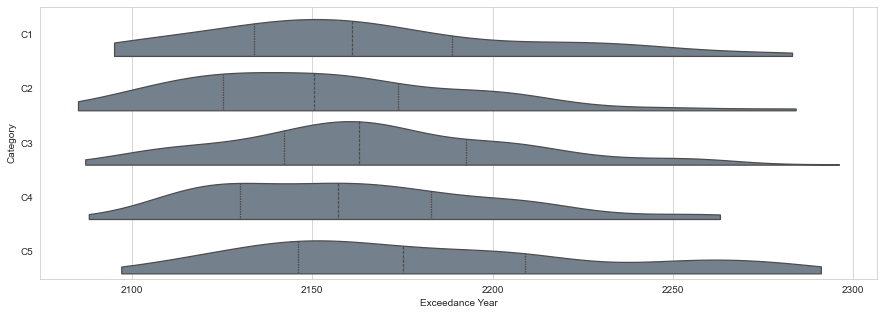

In [ ]:
# TODO: add fraction of scenarios in category in this dataset

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 5))

sns.violinplot(
        data=ydata.reset_index(drop=True),
        x='Exceedance Year',
        y='Category',
        order=cats,
        inner='quart',
        split=True,
        cut=0,
        ax=ax,
        color='slategrey'
        )

fig.savefig('./figure_3d_violin.pdf', bbox_inches='tight', dpi=1e3)

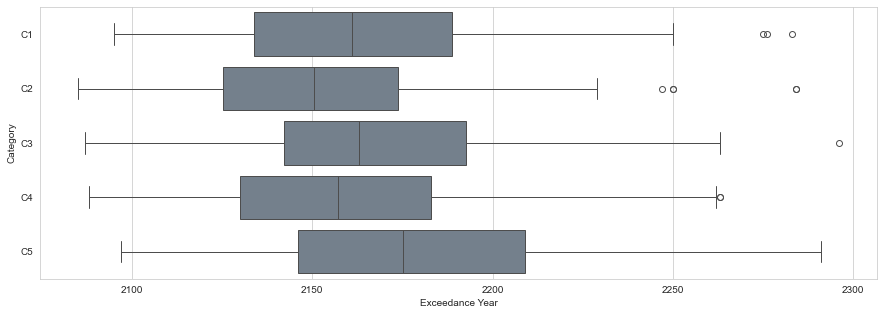

In [ ]:
# TODO: ???? compare with other plot

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(
        data=ydata.reset_index(drop=True),
        x='Exceedance Year',
        y='Category',
        order=cats,
#        inner='quart',
#        split=True,
#        cut=0,
        ax=ax,
        color='slategrey'
        )


fig.savefig('./figure_3d.pdf', bbox_inches='tight', dpi=1e3)
fig.savefig('./figure_3d.png', bbox_inches='tight', dpi=1e3)

# Regional Exceedance

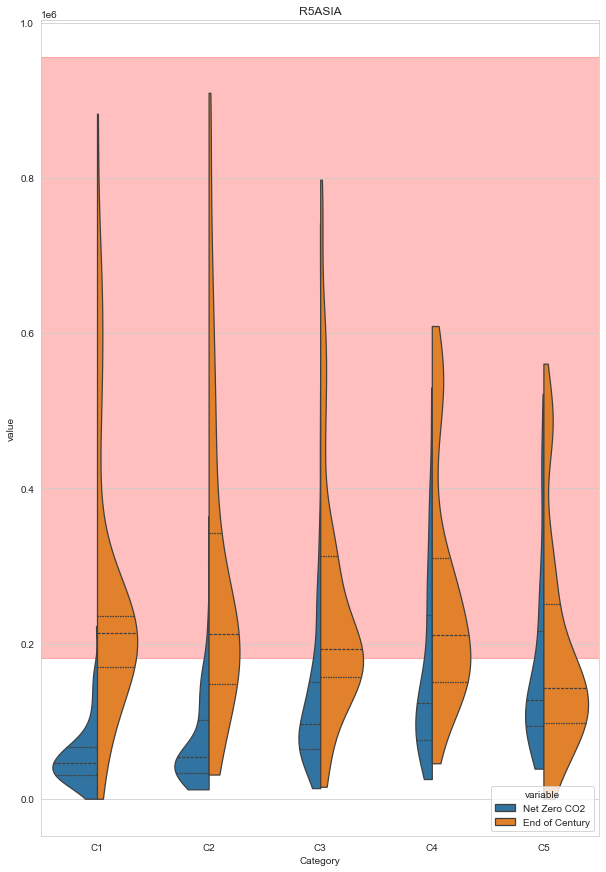

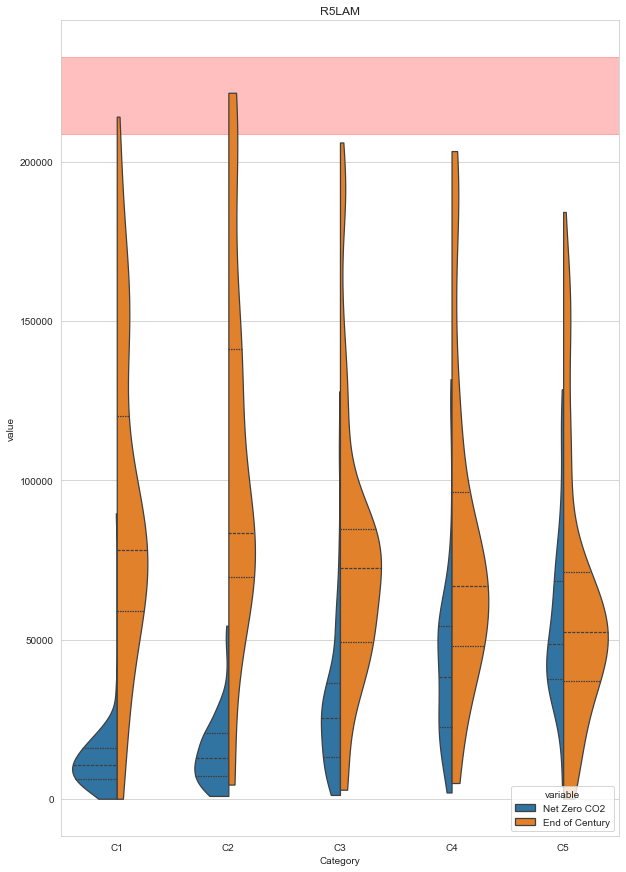

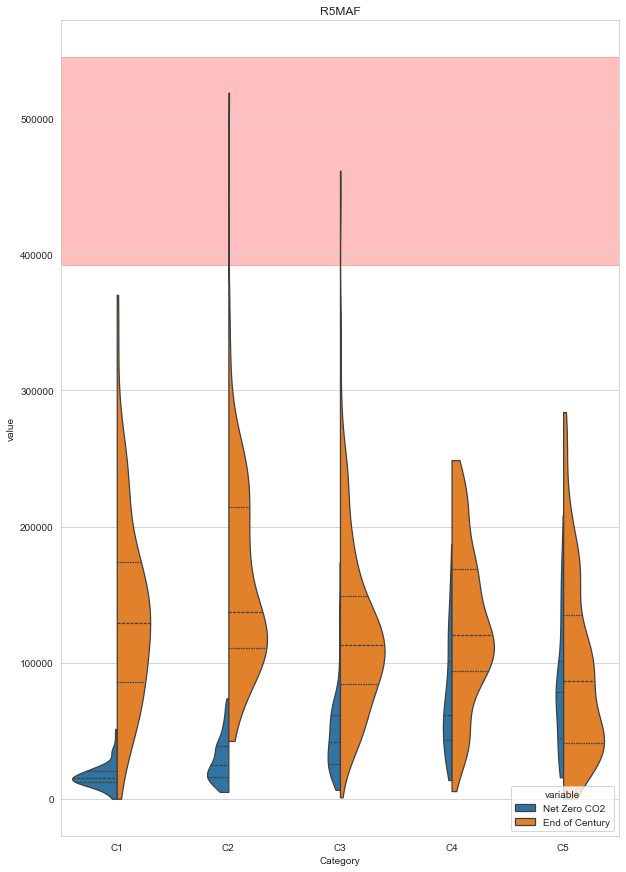

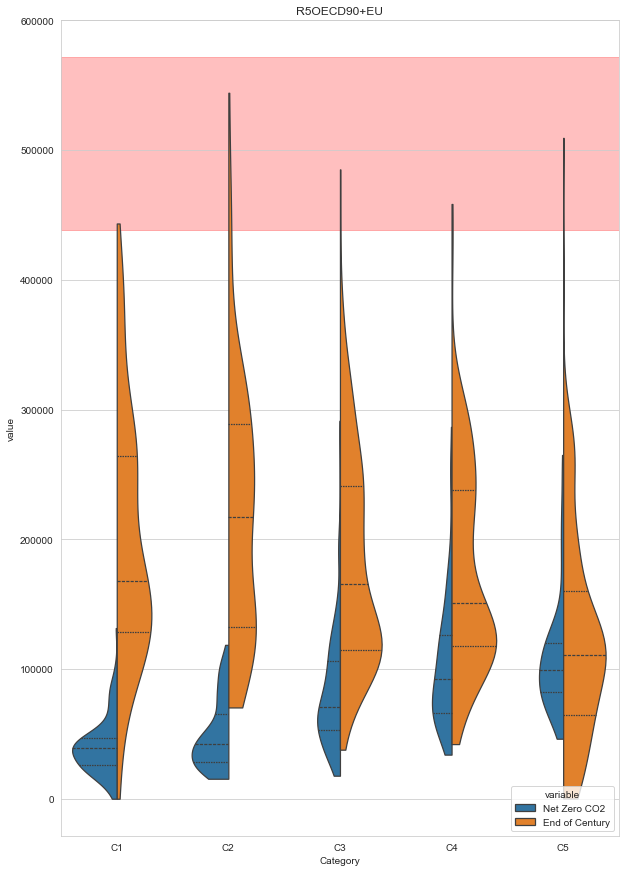

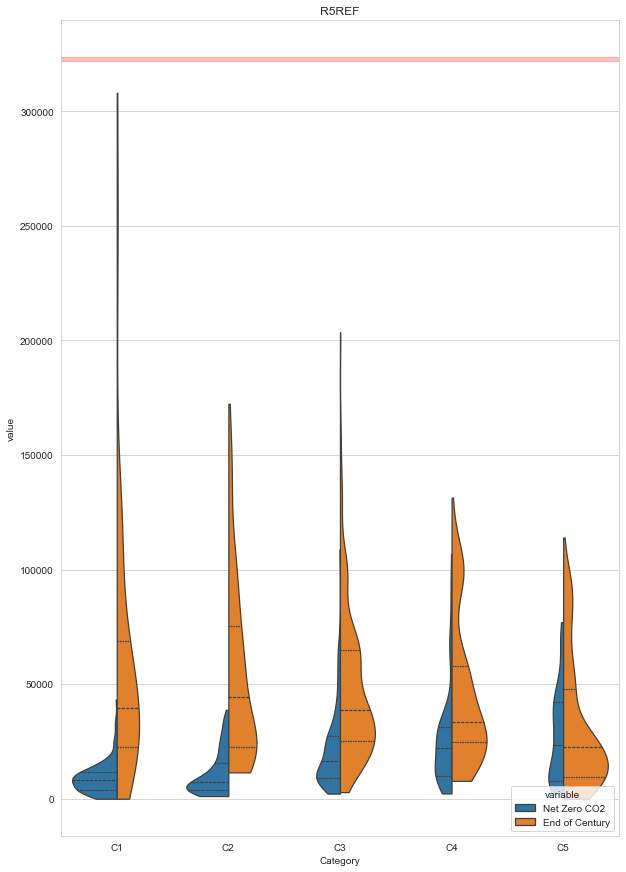

In [ ]:
regions = limits.pix.unique('Region')[limits.pix.unique('Region').str.startswith('R5')]

for region in regions:
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(10, 15))

    sns.violinplot(
            data=mdata.loc[ismatch(Region=region, Variable='Cumulative Carbon Sequestration|CCS')].reset_index(drop=True),
            y='value',
            hue='variable',
            x='Category',
            order=cats,
            inner='quart',
            split=True,
            cut=0,
            ax=ax,
            )

    limit = limits.loc[region, 'Net total storage'] * 1e3
    ax.set_title(region)
    ax.axhspan(limit, ax.get_ylim()[1], color='red', alpha=0.25, zorder=0)